**Q-3.** Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
a. Measure the dispersion in both and interpret the results.
b. Calculate mean and 5% confidence interval and plot it in a graph
c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.
d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.

In [8]:
# link = 'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_'

link_to_data = 'c:data.csv'

import pandas as pd

df = pd.read_csv(link_to_data)

df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


# Task: a. Measure the dispersion in both and interpret the results.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Patient ID                     100 non-null    int64
 1    Blood Pressure Before (mmHg)  100 non-null    int64
 2    Blood Pressure After (mmHg)   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [10]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


In [11]:
#Standard devision before - 6.598278
#standard devision after - 6.888022

<AxesSubplot:>

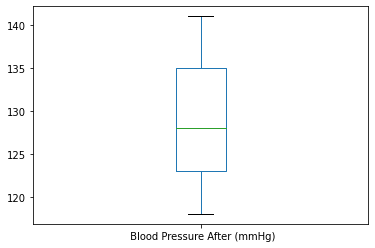

In [12]:
import seaborn as sns

df[' Blood Pressure After (mmHg)'].plot(kind='box')

<AxesSubplot:>

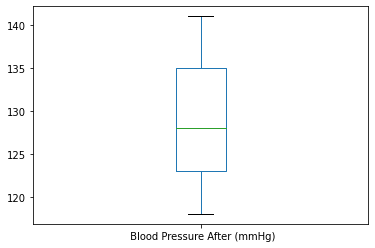

In [13]:
df[' Blood Pressure After (mmHg)'].plot(kind='box')

In [14]:
# Data does not have any outliers either.

# Taks b. Calculate mean and 5% confidence interval and plot it in a graph

In [16]:
import math
from scipy.stats import norm

mean_before = df[' Blood Pressure Before (mmHg)'].mean()
std_dev_before = df[' Blood Pressure Before (mmHg)'].std()
print("mean before: ", mean_before, "std_dev", std_dev_before)

margine_of_error = std_dev_before/ math.sqrt(len(df))


confidence_level = 0.95  # 95% confidence level (2.5% in each tail)
alpha = 1 - confidence_level
# Calculate the z-value for the desired confidence level
z_value = norm.ppf(1 - (alpha) / 2)

print("Z-value:", z_value)


upper_bound_before = mean_before + (z_value*margine_of_error)
lower_bound_before = mean_before - (z_value*margine_of_error)

print(upper_bound_before, lower_bound_before)

mean before:  133.91 std_dev 6.598278012275075
Z-value: 1.959963984540054
135.20323872640415 132.61676127359584


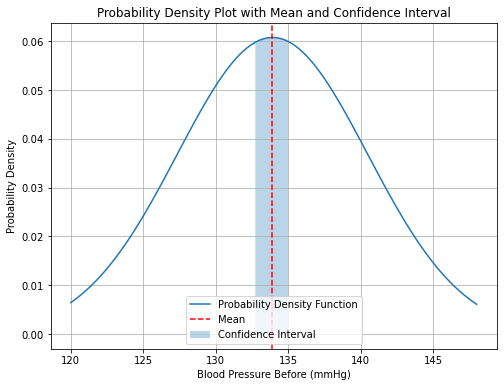

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data
data = df[' Blood Pressure Before (mmHg)']  # Column data
mean = mean_before # Mean value
lower_bound = lower_bound_before # Lower bound value
upper_bound = upper_bound_before  # Upper bound value

# Estimate parameters of normal distribution
mu, std = norm.fit(data)

# Generate x-values for PDF plot
x = np.linspace(min(data), max(data), 100)

# Calculate PDF values using estimated parameters
pdf = norm.pdf(x, mu, std)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Probability Density Function')
plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
plt.fill_between(x, 0, pdf, where=((x >= lower_bound) & (x <= upper_bound)), alpha=0.3, label='Confidence Interval')
plt.xlabel('Blood Pressure Before (mmHg)')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot with Mean and Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import math
from scipy.stats import norm

mean_After = df[' Blood Pressure After (mmHg)'].mean()
std_dev_After = df[' Blood Pressure After (mmHg)'].std()
print("mean after: ", mean_After, "std_dev: ", std_dev_After)

margine_of_error = std_dev_After/ math.sqrt(len(df))


confidence_level = 0.95  # 95% confidence level (2.5% in each tail)
alpha = 1 - confidence_level
# Calculate the z-value for the desired confidence level
z_value = norm.ppf(1 - ((alpha) / 2))

print("Z-value:", z_value)


upper_bound_After = mean_After + (z_value*margine_of_error)
lower_bound_After = mean_After - (z_value*margine_of_error)

print(upper_bound, lower_bound)

mean after:  128.36 std_dev:  6.8880221025232276
Z-value: 1.959963984540054
135.20323872640415 132.61676127359584


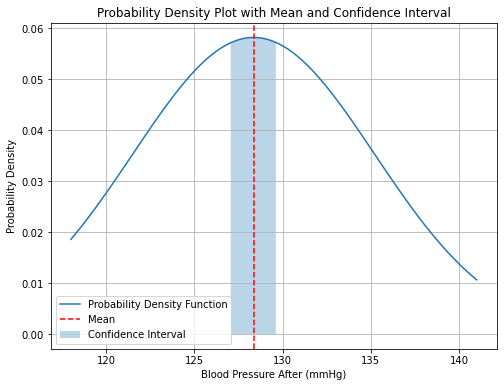

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data
data = df[" Blood Pressure After (mmHg)"]  # Column data
mean = mean_After # Mean value
lower_bound = lower_bound_After # Lower bound value
upper_bound = upper_bound_After  # Upper bound value

# Estimate parameters of normal distribution
mu, std = norm.fit(data)

# Generate x-values for PDF plot
x = np.linspace(min(data), max(data), 100)

# Calculate PDF values using estimated parameters
pdf = norm.pdf(x, mu, std)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Probability Density Function')
plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
plt.fill_between(x, 0, pdf, where=((x >= lower_bound) & (x <= upper_bound)), alpha=0.3, label='Confidence Interval')
plt.xlabel('Blood Pressure After (mmHg)')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot with Mean and Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [20]:
print("standard deviation after: ", std_dev_After)
print("standard deviation befor: ", std_dev_before)

standard deviation after:  6.8880221025232276
standard deviation befor:  6.598278012275075


In [21]:
import numpy as np

# Example dataset
data = df[' Blood Pressure After (mmHg)']

# Calculate the mean
mean = np.mean(data)

# Calculate the mean absolute deviation
mad = np.mean(np.abs(data - mean))

print("Mean Absolute Deviation for BP after:", mad)

Mean Absolute Deviation for BP after: 5.9


In [22]:
import numpy as np

# Example dataset
data = df[' Blood Pressure Before (mmHg)']

# Calculate the mean
mean = np.mean(data)

# Calculate the mean absolute deviation
mad = np.mean(np.abs(data - mean))

print("Mean Absolute Deviation for BP Before:", mad)

Mean Absolute Deviation for BP Before: 5.7118


In [23]:
from scipy.stats import pearsonr



# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df[' Blood Pressure After (mmHg)'], df[' Blood Pressure Before (mmHg)'])

print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

# Check significance at 1% level (alpha = 0.01)
alpha = 0.01
if p_value < alpha:
    print("The correlation is statistically significant at the 1% level.")
else:
    print("The correlation is not statistically significant at the 1% level.")

Correlation Coefficient: 0.9779485966556019
P-value: 1.8097381433068541e-68
The correlation is statistically significant at the 1% level.
